In [1]:
pip install geopandas matplotlib shapely pandas


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import datetime as dt

In [3]:
data = {
    'timestamp': [
        '2024-08-05 08:00', '2024-08-05 09:00', '2024-08-05 10:00', 
        '2024-08-05 11:00', '2024-08-05 12:00', '2024-08-05 13:00'
    ],
    'latitude': [40.7128, 40.7138, 40.7148, 40.7158, 40.7168, 40.7178],
    'longitude': [-74.0060, -74.0050, -74.0040, -74.0030, -74.0020, -74.0010]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

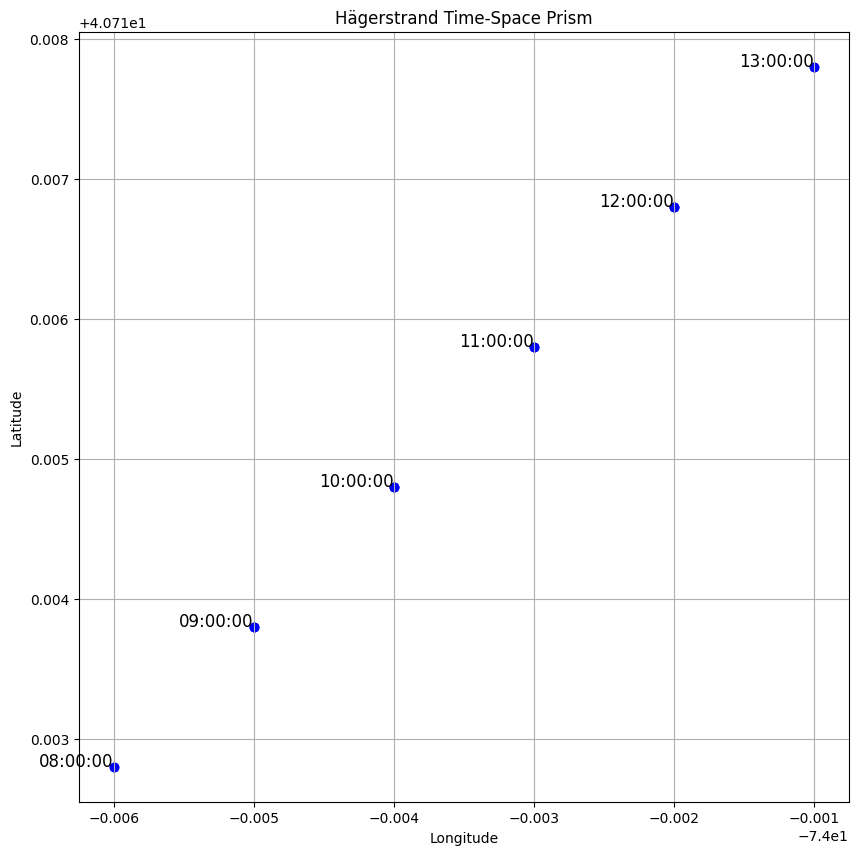

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the base map (you can use any base map, here we use a simple plot)
gdf.plot(ax=ax, color='blue', marker='o')

# Add lines connecting the points to show the movement
for i in range(len(gdf) - 1):
    line = gpd.GeoSeries([gdf.geometry.iloc[i], gdf.geometry.iloc[i + 1]]).unary_union
    gpd.GeoSeries([line]).plot(ax=ax, color='blue')

# Adding annotations for times
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['timestamp']):
    ax.text(x, y, str(label.time()), fontsize=12, ha='right')

plt.title('Hägerstrand Time-Space Prism')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

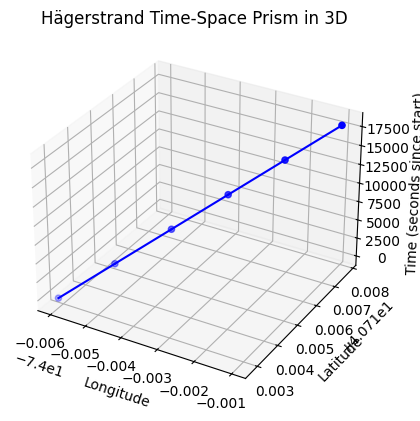

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert timestamps to numeric values for 3D plotting
time_numeric = (gdf['timestamp'] - gdf['timestamp'].min()).dt.total_seconds()

ax.scatter(gdf.geometry.x, gdf.geometry.y, time_numeric, c='blue', marker='o')

# Plot lines
for i in range(len(gdf) - 1):
    xs = [gdf.geometry.x.iloc[i], gdf.geometry.x.iloc[i + 1]]
    ys = [gdf.geometry.y.iloc[i], gdf.geometry.y.iloc[i + 1]]
    zs = [time_numeric.iloc[i], time_numeric.iloc[i + 1]]
    ax.plot(xs, ys, zs, color='blue')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time (seconds since start)')
plt.title('Hägerstrand Time-Space Prism in 3D')
plt.show()